# Body Fat Estimator

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [57]:
import warnings
warnings.filterwarnings("ignore")

## Data

In [58]:
df = pd.read_csv('bodyfat.csv')

In [59]:
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [61]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Density,252.0,1.055574,0.019031,0.995,1.0414,1.0549,1.0704,1.1089
BodyFat,252.0,19.150794,8.368740,0.000,12.4750,19.2000,25.3000,47.5000
Age,252.0,44.884921,12.602040,22.000,35.7500,43.0000,54.0000,81.0000
Weight,252.0,178.924405,29.389160,118.500,159.0000,176.5000,197.0000,363.1500
Height,252.0,70.148810,3.662856,29.500,68.2500,70.0000,72.2500,77.7500
Neck,252.0,37.992063,2.430913,31.100,36.4000,38.0000,39.4250,51.2000
Chest,252.0,100.824206,8.430476,79.300,94.3500,99.6500,105.3750,136.2000
Abdomen,252.0,92.555952,10.783077,69.400,84.5750,90.9500,99.3250,148.1000
Hip,252.0,99.904762,7.164058,85.000,95.5000,99.3000,103.5250,147.7000
Thigh,252.0,59.405952,5.249952,47.200,56.0000,59.0000,62.3500,87.3000


In [62]:
df.isna().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

## EDA

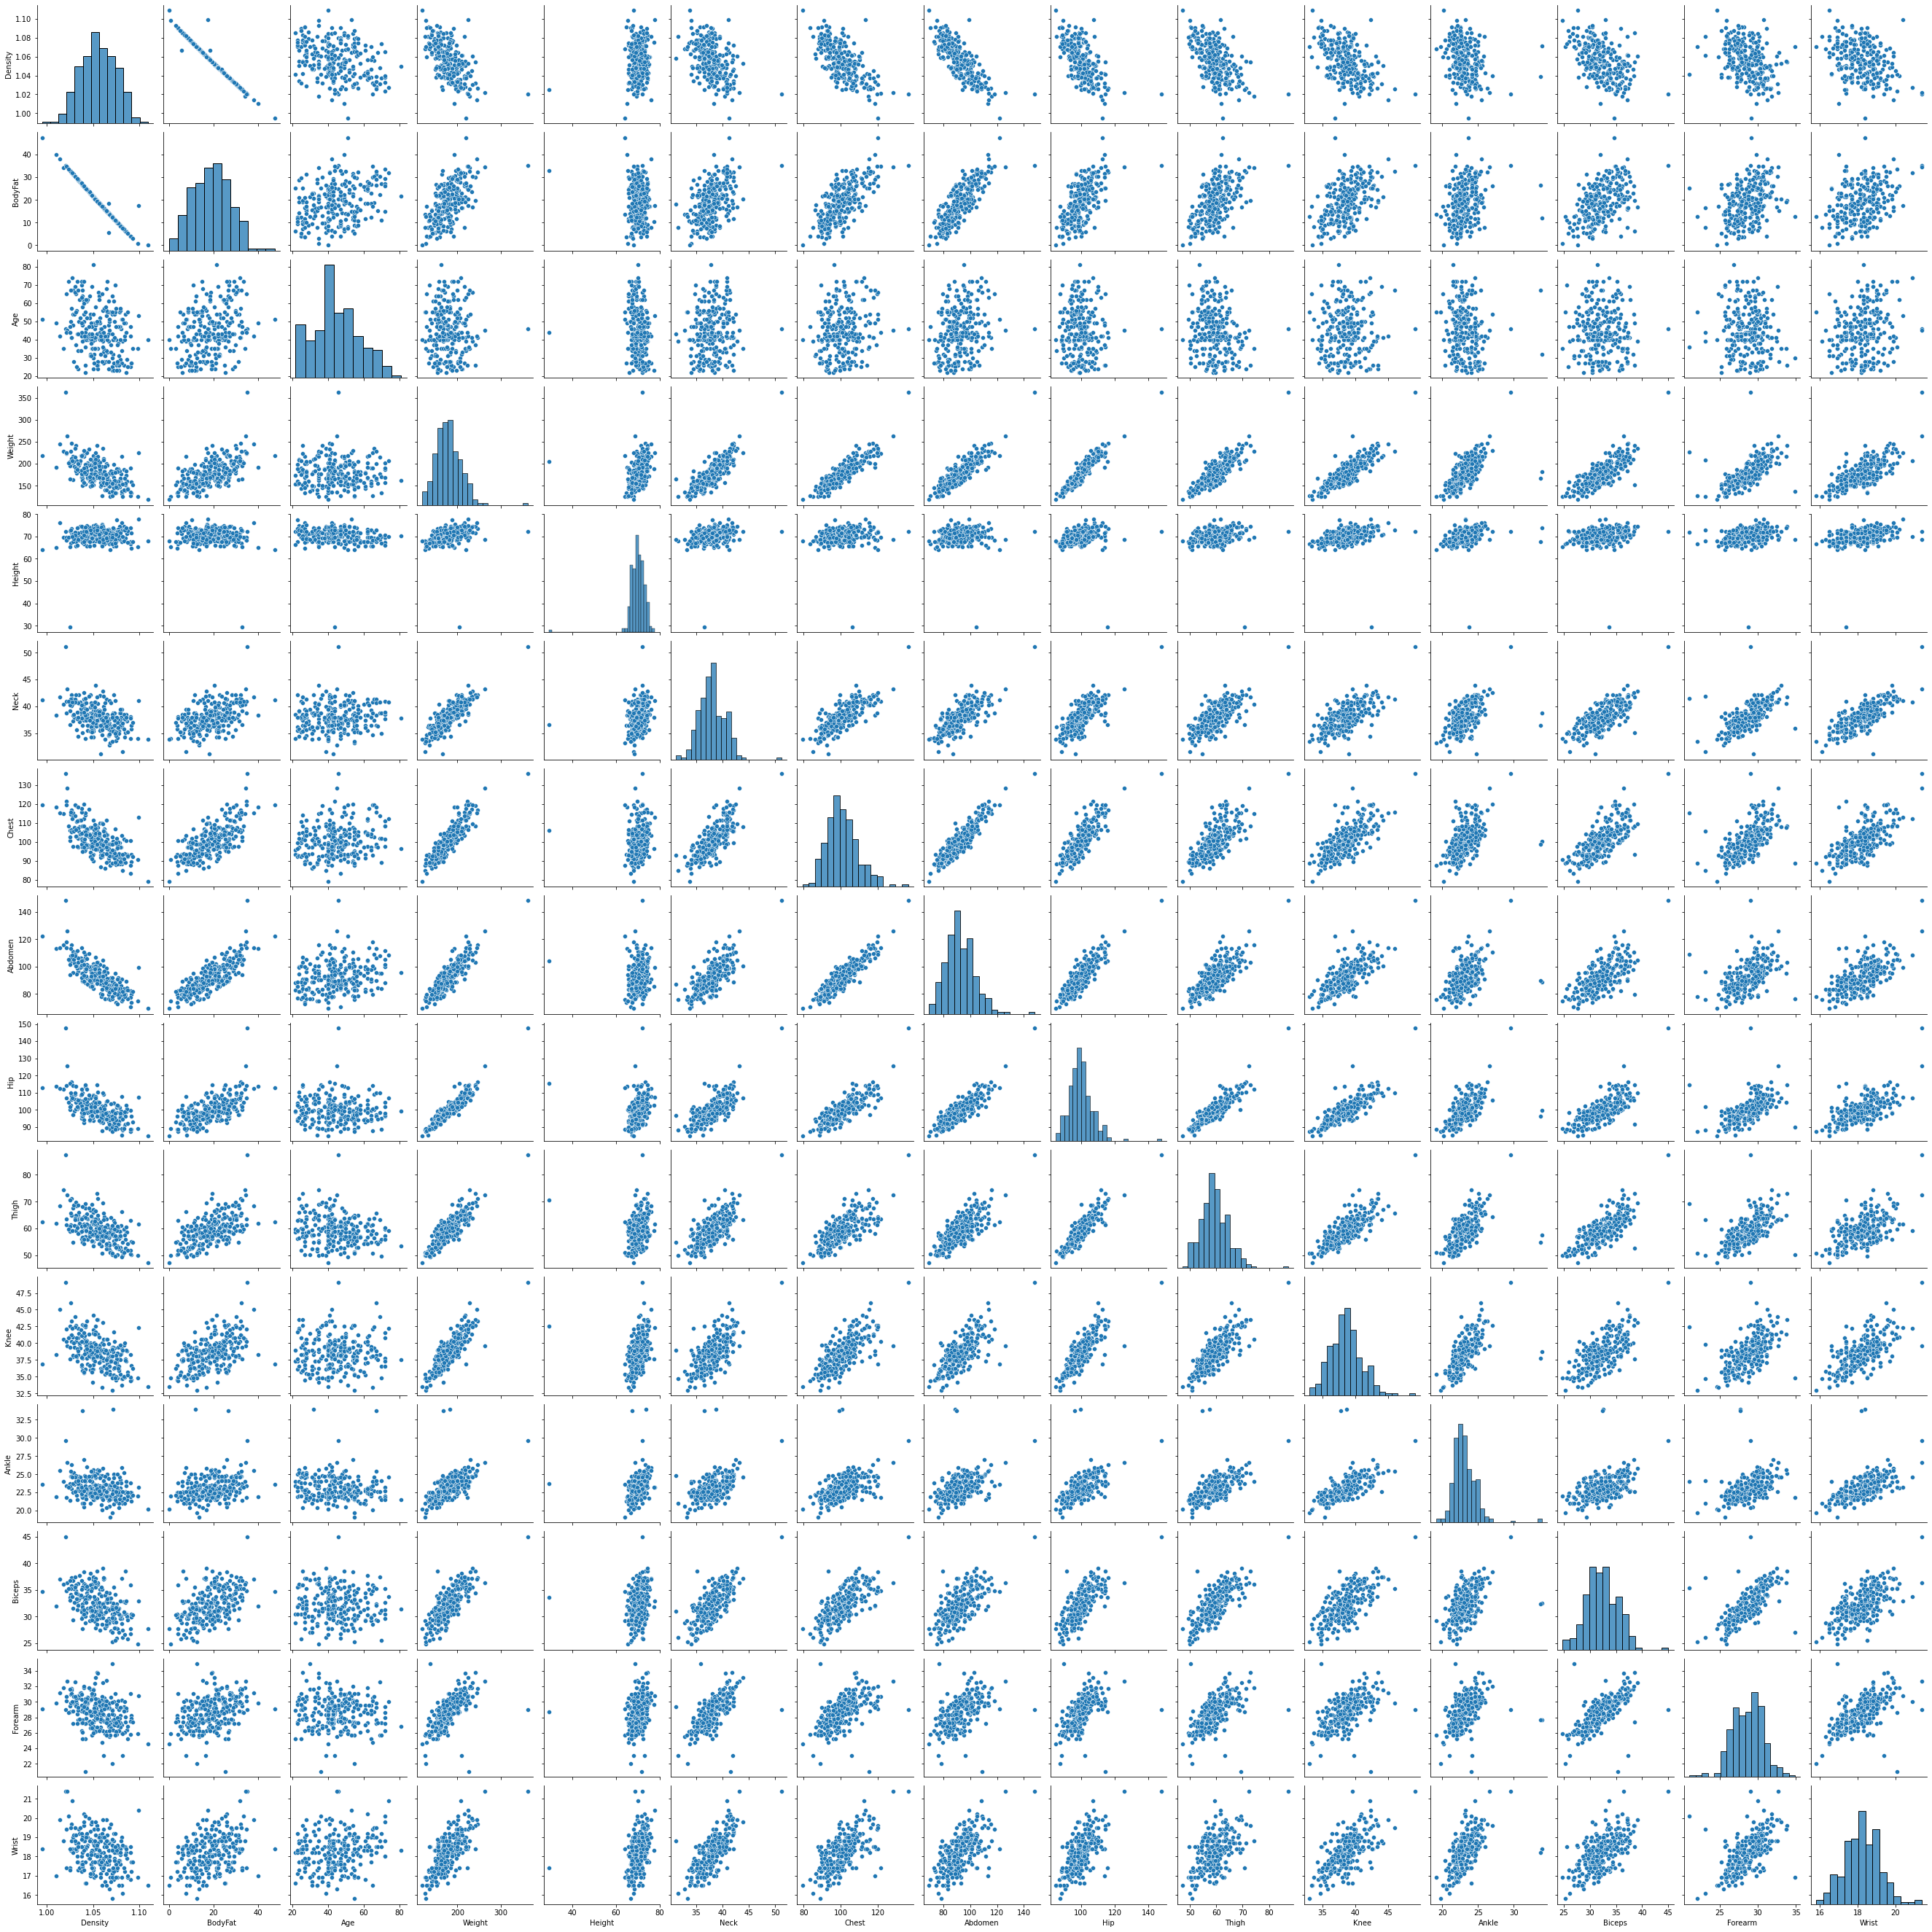

In [63]:
sns.pairplot(df)

<AxesSubplot:xlabel='BodyFat'>

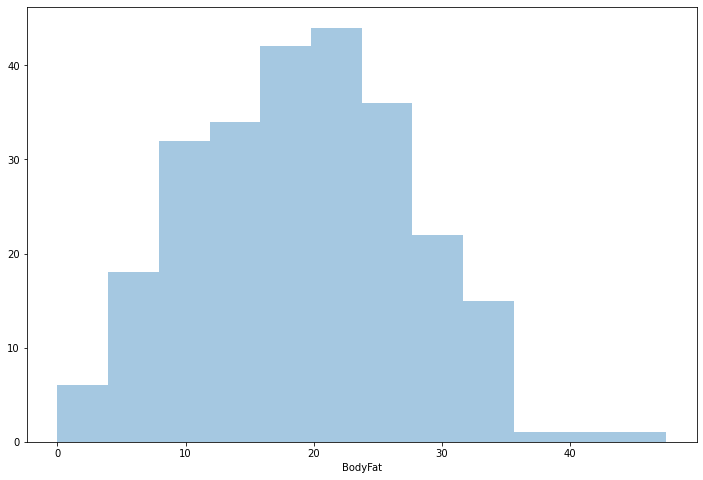

In [64]:
plt.figure(figsize=(12,8))
sns.distplot(df['BodyFat'],kde=False)

<AxesSubplot:xlabel='Density', ylabel='BodyFat'>

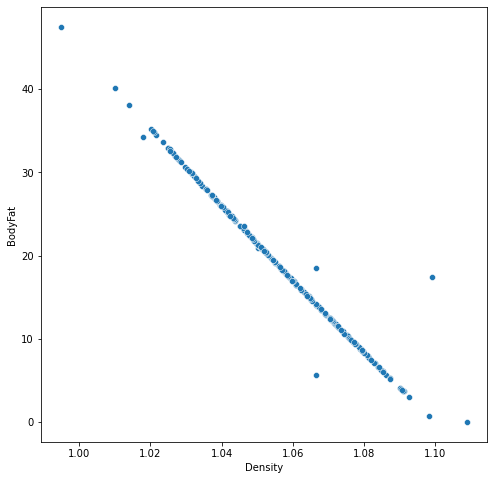

In [65]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='Density',y='BodyFat',data=df)

<AxesSubplot:xlabel='Weight', ylabel='BodyFat'>

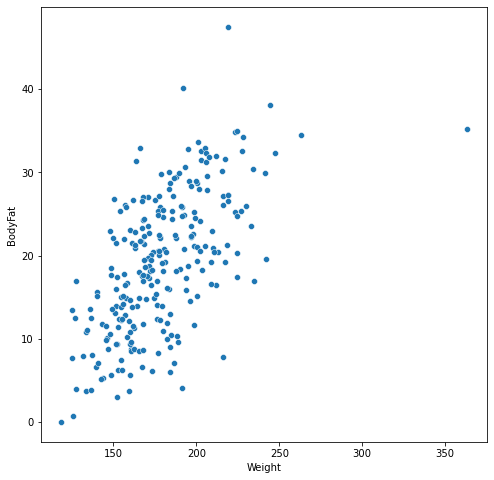

In [66]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='Weight',y='BodyFat',data=df)

<AxesSubplot:>

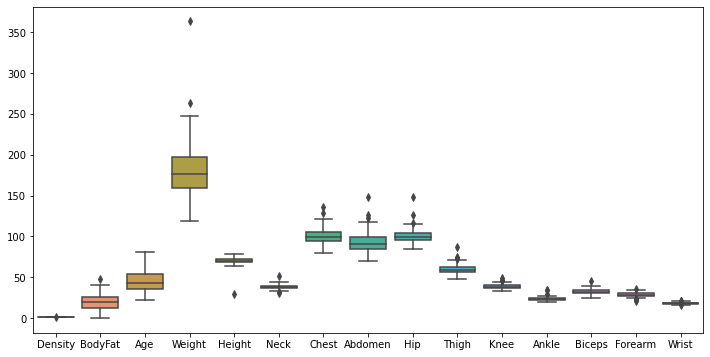

In [67]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df)

<AxesSubplot:xlabel='Age'>

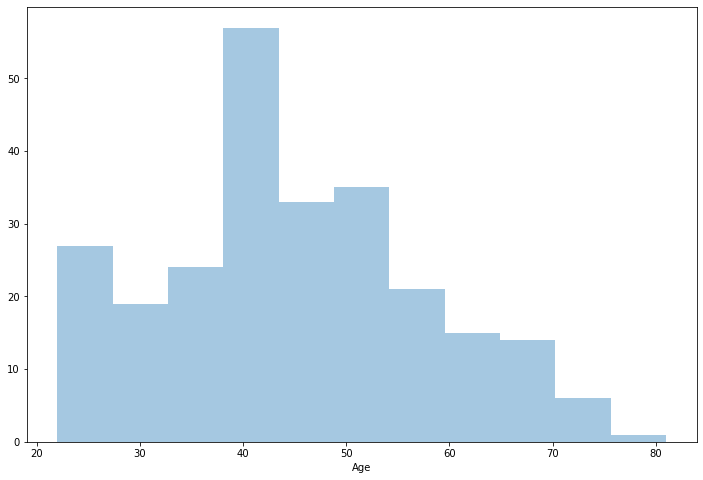

In [68]:
plt.figure(figsize=(12,8))
sns.distplot(df['Age'],kde=False)

<AxesSubplot:xlabel='Age', ylabel='BodyFat'>

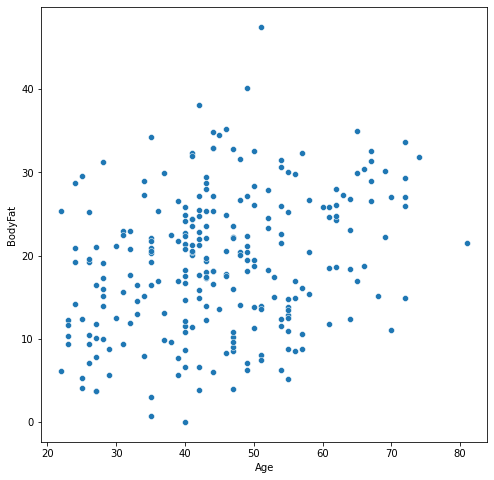

In [69]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='Age',y='BodyFat',data=df)

<AxesSubplot:xlabel='Height', ylabel='BodyFat'>

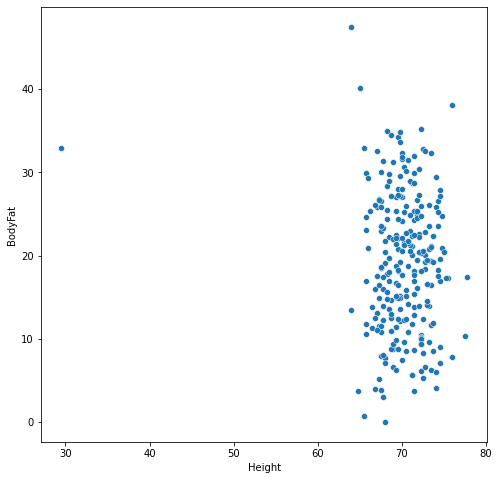

In [70]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='Height',y='BodyFat',data=df)

In [71]:
cor= df.corr()
cor

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
Density,1.000000,-0.987782,-0.277637,-0.594062,0.097881,-0.472966,-0.682599,-0.798955,-0.609331,-0.553091,-0.495040,-0.264890,-0.487109,-0.351648,-0.325716
BodyFat,-0.987782,1.000000,0.291458,0.612414,-0.089495,0.490592,0.702620,0.813432,0.625201,0.559608,0.508665,0.265970,0.493271,0.361387,0.346575
Age,-0.277637,0.291458,1.000000,-0.012746,-0.171645,0.113505,0.176450,0.230409,-0.050332,-0.200096,0.017516,-0.105058,-0.041162,-0.085056,0.213531
Weight,-0.594062,0.612414,-0.012746,1.000000,0.308279,0.830716,0.894191,0.887995,0.940884,0.868694,0.853167,0.613685,0.800416,0.630301,0.729775
Height,0.097881,-0.089495,-0.171645,0.308279,1.000000,0.253710,0.134892,0.087813,0.170394,0.148436,0.286053,0.264744,0.207816,0.228649,0.322065
Neck,-0.472966,0.490592,0.113505,0.830716,0.253710,1.000000,0.784835,0.754077,0.734958,0.695697,0.672405,0.477892,0.731146,0.623660,0.744826
Chest,-0.682599,0.702620,0.176450,0.894191,0.134892,0.784835,1.000000,0.915828,0.829420,0.729859,0.719496,0.482988,0.727907,0.580173,0.660162
Abdomen,-0.798955,0.813432,0.230409,0.887995,0.087813,0.754077,0.915828,1.000000,0.874066,0.766624,0.737179,0.453223,0.684983,0.503316,0.619832
Hip,-0.609331,0.625201,-0.050332,0.940884,0.170394,0.734958,0.829420,0.874066,1.000000,0.896410,0.823473,0.558387,0.739273,0.545014,0.630090
Thigh,-0.553091,0.559608,-0.200096,0.868694,0.148436,0.695697,0.729859,0.766624,0.896410,1.000000,0.799170,0.539797,0.761477,0.566842,0.558685


<AxesSubplot:>

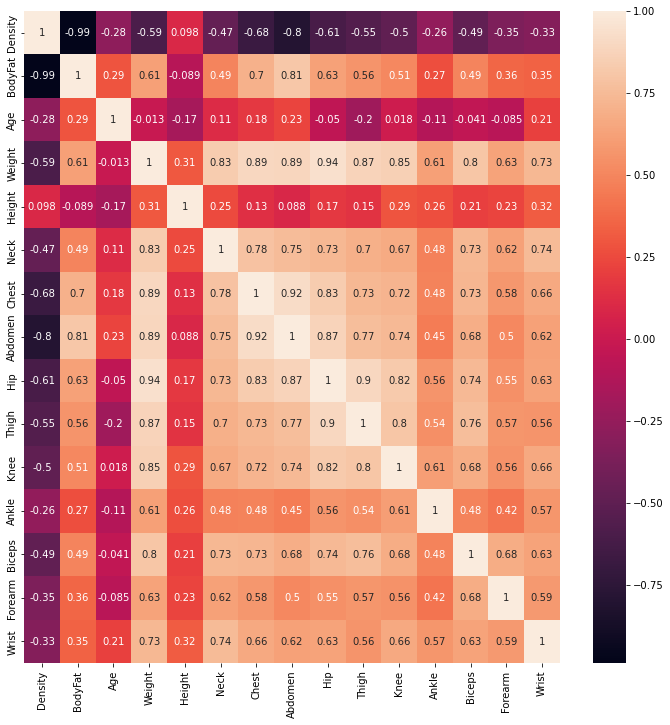

In [72]:
plt.figure(figsize=(12,12))
sns.heatmap(cor,annot=True)

In [73]:
def diplot(column):
    
    plt.figure(figsize=(12,8))
    sns.distplot(df['BodyFat'],color='blue',hist=False,label='Body fat')
    sns.distplot(df[column],color='red',hist=False,label=column)
    plt.legend()
    plt.show()

In [74]:
Col=list(df.columns)

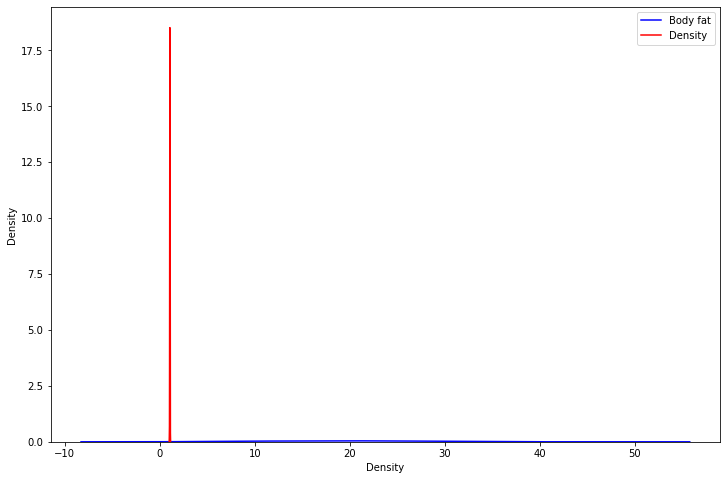

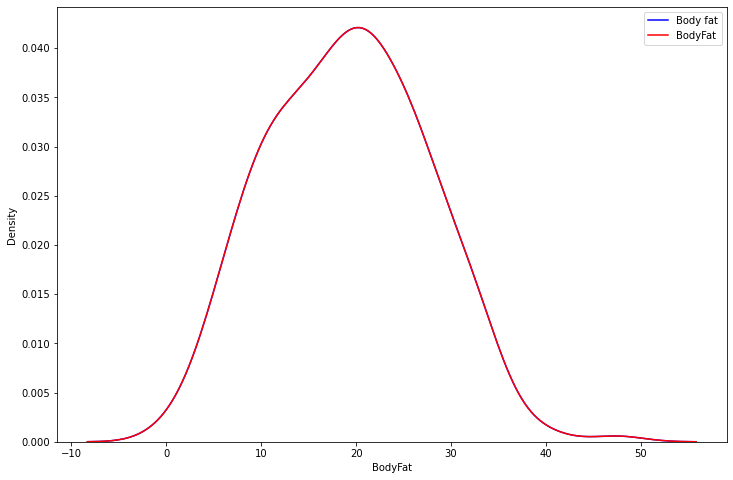

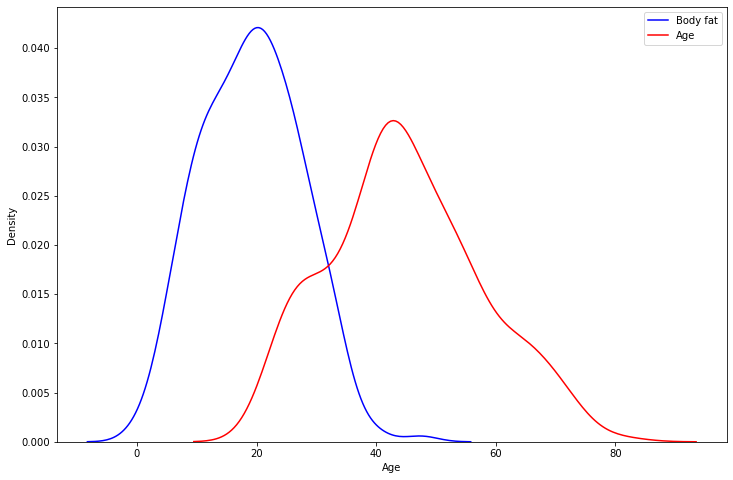

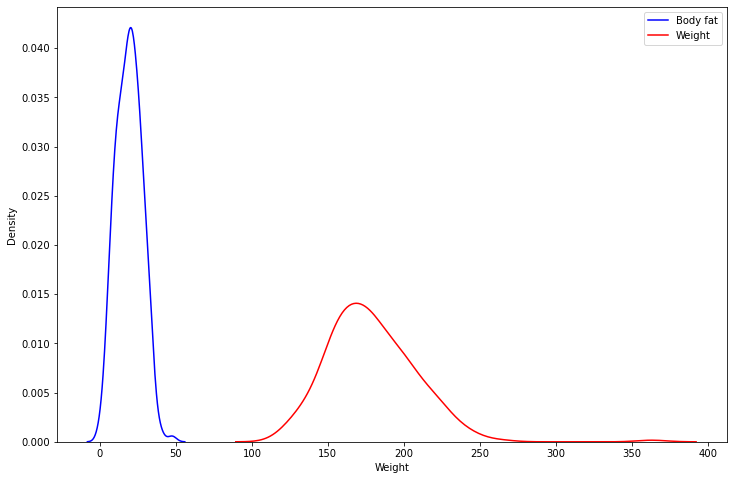

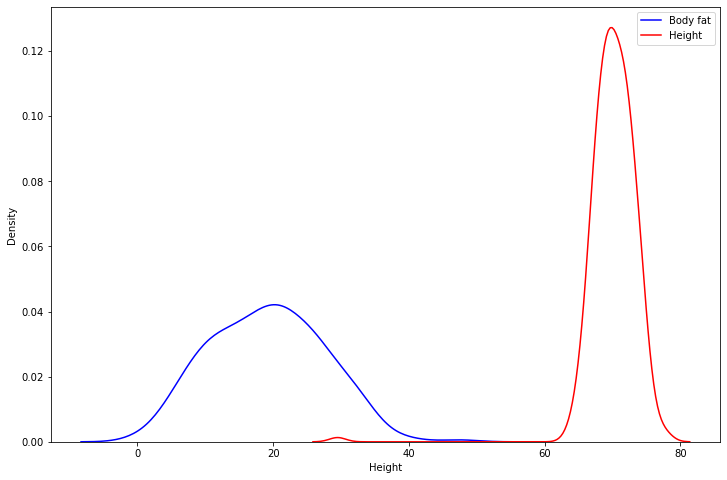

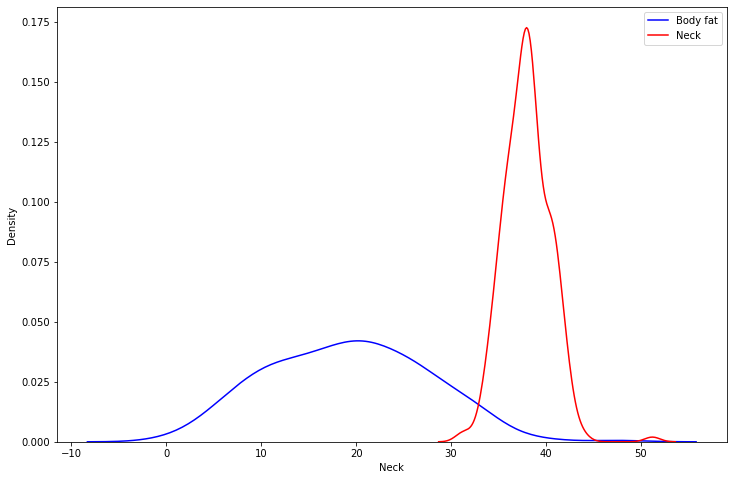

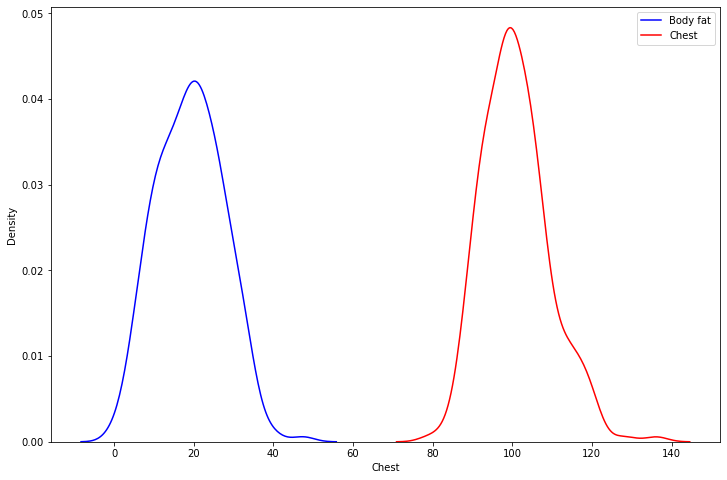

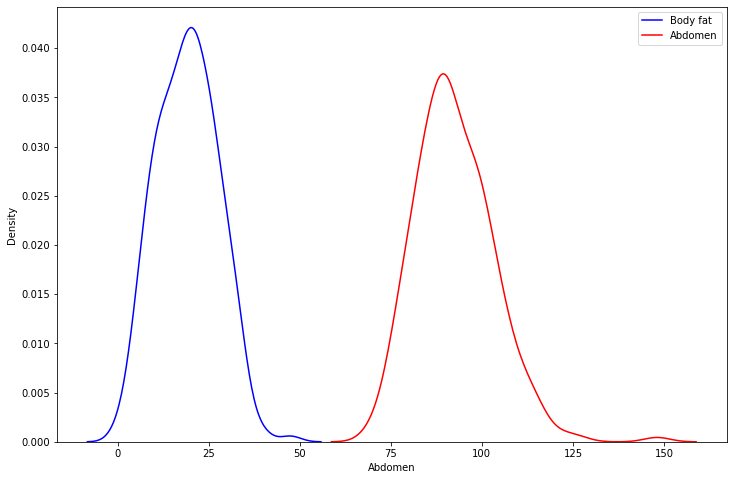

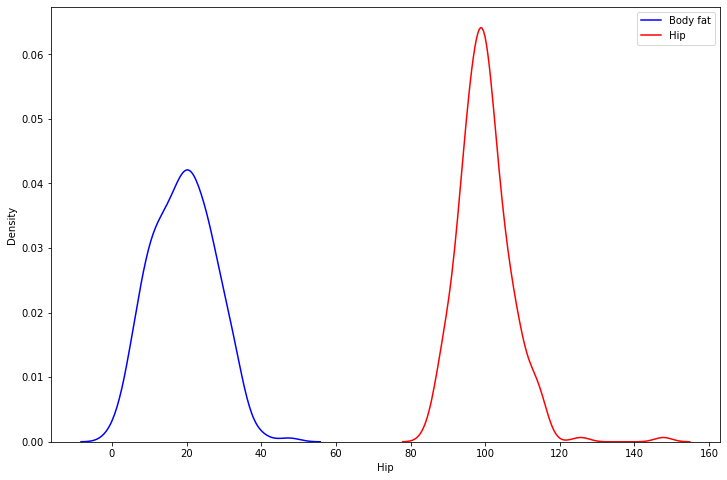

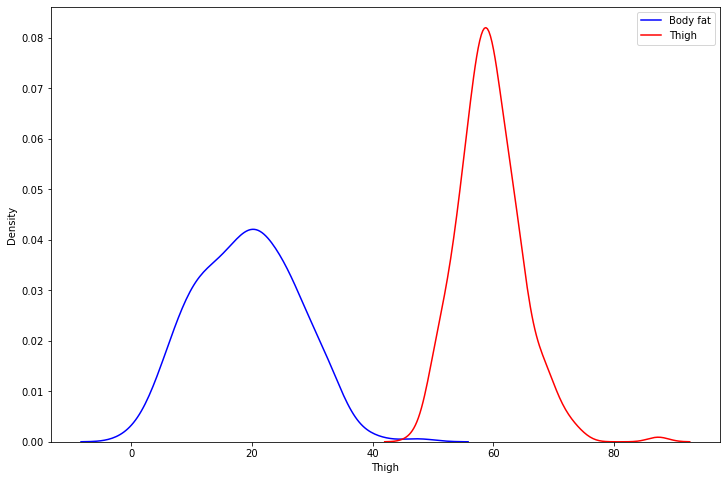

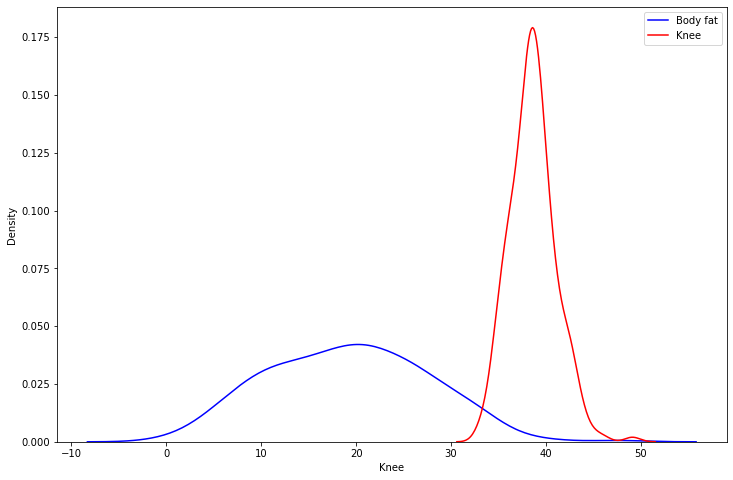

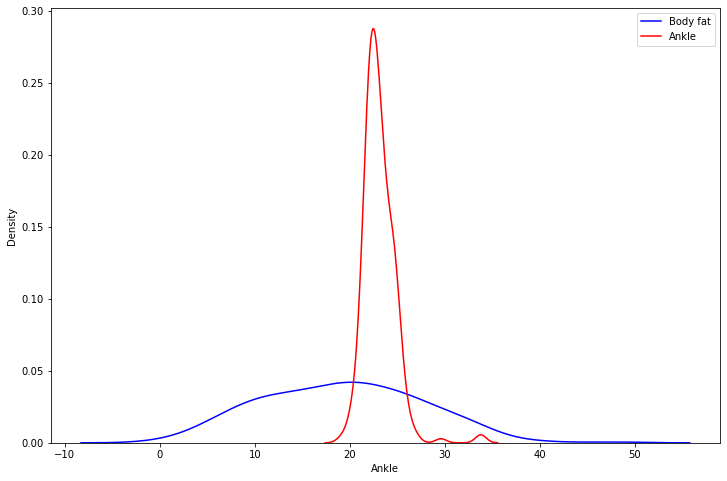

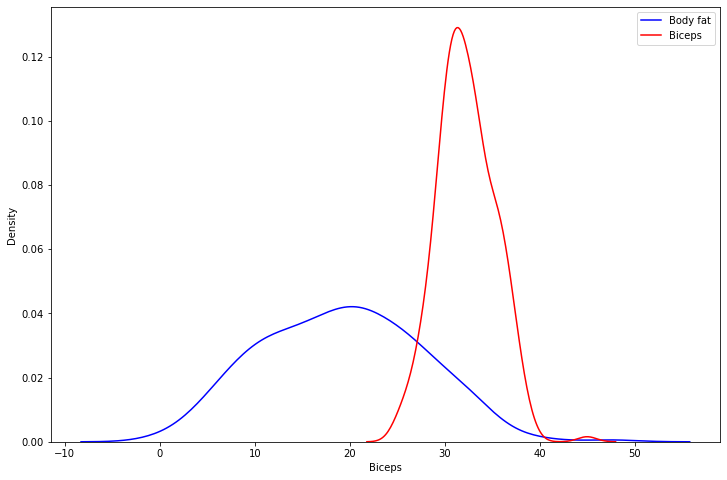

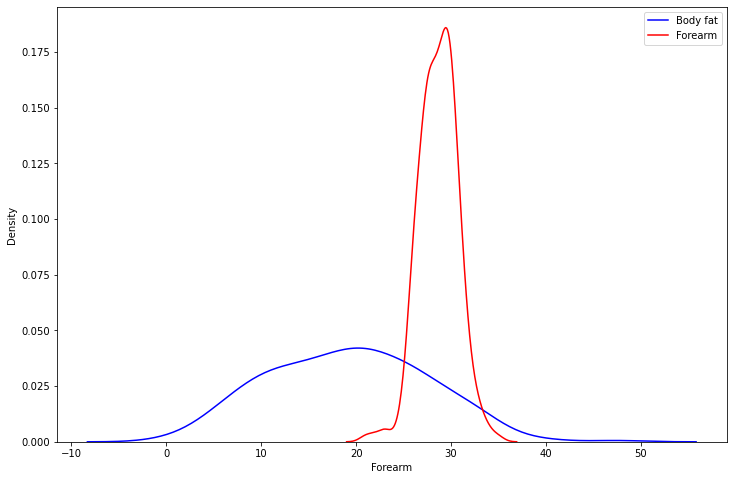

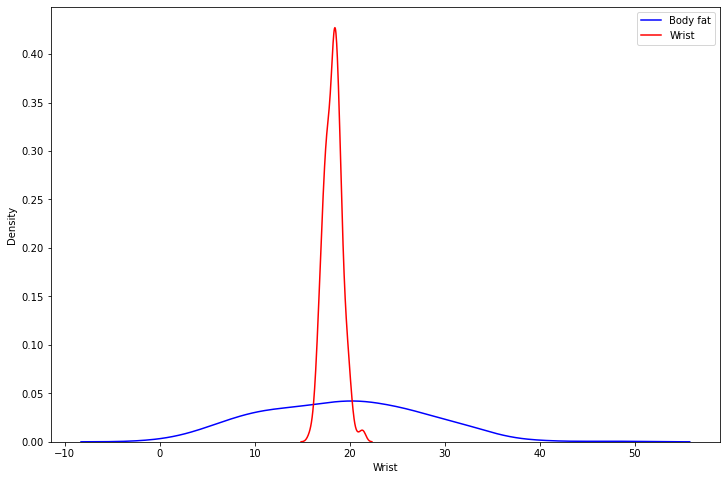

In [75]:
for i in Col:
    diplot(i)

**Looking at all the feature gaussian distribution we can ignore sone of the feature for the analysis**

## Outlieres

In [76]:
from scipy import stats

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [78]:
df_new= df[np.abs(stats.zscore(df)<3).all(axis=1)]

In [79]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  245 non-null    float64
 1   BodyFat  245 non-null    float64
 2   Age      245 non-null    int64  
 3   Weight   245 non-null    float64
 4   Height   245 non-null    float64
 5   Neck     245 non-null    float64
 6   Chest    245 non-null    float64
 7   Abdomen  245 non-null    float64
 8   Hip      245 non-null    float64
 9   Thigh    245 non-null    float64
 10  Knee     245 non-null    float64
 11  Ankle    245 non-null    float64
 12  Biceps   245 non-null    float64
 13  Forearm  245 non-null    float64
 14  Wrist    245 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 30.6 KB


## Important Feature Selection

In [80]:
X= df_new.drop('BodyFat',axis=1)
y= df_new['BodyFat']

### Extra Tree Regressor

In [81]:
from sklearn.ensemble import ExtraTreesRegressor
Er= ExtraTreesRegressor()

In [82]:
Er.fit(X,y)

ExtraTreesRegressor()

In [83]:
Er.feature_importances_

array([7.50333354e-01, 1.70004325e-03, 2.70015788e-02, 2.34887423e-03,
       1.37885571e-03, 3.15745539e-02, 1.62880204e-01, 1.05212713e-02,
       4.42444490e-03, 3.41850593e-03, 8.09098217e-04, 7.42699075e-04,
       9.55861842e-04, 1.91065478e-03])

In [84]:
S= pd.Series(Er.feature_importances_,index=X.columns)

In [85]:
S.nlargest(5)

Density    0.750333
Abdomen    0.162880
Chest      0.031575
Weight     0.027002
Hip        0.010521
dtype: float64

<AxesSubplot:>

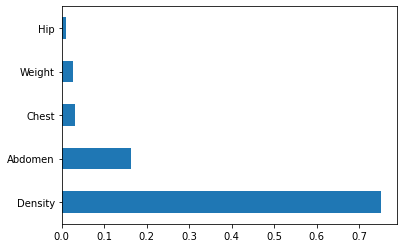

In [86]:
S.nlargest(5).plot(kind='barh')

### Mutual Information gain Feature

In [87]:
from sklearn.feature_selection import mutual_info_regression

Mu= mutual_info_regression(X,y)


<AxesSubplot:>

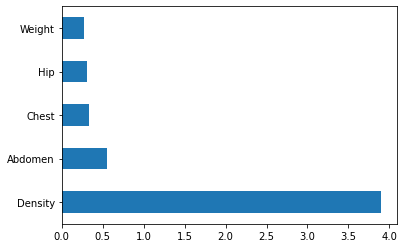

In [88]:
S1= pd.Series(Mu,index=X.columns)
S1.nlargest(5).plot(kind='barh')

## Creating the Train and Test Data

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
X_new= df_new[['Density','Abdomen','Chest','Hip','Weight','Thigh']]
y_new= df_new['BodyFat']

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

## Scaling

In [92]:
from sklearn.preprocessing import StandardScaler
Sc= StandardScaler()

In [93]:
X_train= Sc.fit_transform(X_train)
X_test= Sc.transform(X_test)

## Model Building

In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=2)
from sklearn.svm import SVR

In [95]:
Lr1= LinearRegression()
polyreg=make_pipeline(PolynomialFeatures(degree=2),LinearRegression())
polyreg3=make_pipeline(PolynomialFeatures(degree=3),LinearRegression())
rid= Ridge(alpha=1)
polyrid=make_pipeline(PolynomialFeatures(degree=2),Ridge())
polyrid3=make_pipeline(PolynomialFeatures(degree=3),Ridge())
Las = Lasso(alpha=1)
polylas=make_pipeline(PolynomialFeatures(degree=2),Lasso())
polylas3=make_pipeline(PolynomialFeatures(degree=3),Lasso())
sgd=SGDRegressor(max_iter=1000, tol=1e-3)
dt=DecisionTreeRegressor()
M1= RandomForestRegressor()
ada= AdaBoostRegressor()
gbr=GradientBoostingRegressor(max_depth=5)
svr=SVR()

In [96]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [97]:
model = Sequential()

model.add(Dense(units=9,activation='relu'))
#model.add(Dropout(0.5))
# best values is b/w 0.2 to 0.5


model.add(Dense(units=5,activation='relu'))
#model.add(Dropout(0.5))

model.add(Dense(units=1,activation='relu'))

model.compile(optimizer='adam',loss='mse')

In [98]:
erly = EarlyStopping(monitor='val_loss',mode='min',verbose=0,patience=25)

In [99]:
model.fit(x=X_train,y=y_train,epochs=300,verbose=0,validation_data=(X_test,y_test),callbacks=[erly])

In [100]:
Name=['Linear Regression','Linear Regression digree 2','Linear Regression digree 3','Ridge Regression',
      'Ridge Regression digree 2','Ridge Regression digree 3','Lasso','Lasso digree 2','SGDRegressor',
     'Decision Tree Regressor','Random Forest Regressor','AdaBoost Regressor','Gradient Boosting Regressor','KNN Regressor',
      'Support Vector Machine','Neural Network Regression']
clfs= [Lr1,polyreg,polyreg3,rid,polyrid,polyrid3,Las,polylas,sgd,dt,M1,ada,gbr,knn,svr,model]

In [101]:
from sklearn.metrics import mean_squared_log_error,mean_squared_error,mean_absolute_error,r2_score

In [102]:
results=[]
for i in clfs:
    i.fit(X_train,y_train)
    r2=r2_score(y_test, i.predict(X_test))
    results.append(r2)

7/7 [==============================] - 0s 2ms/step - loss: 0.8343


In [103]:
score= pd.DataFrame(results,index=Name)
score.columns=['R2']
score.sort_values(by='R2',ascending=False)

,R2
Random Forest Regressor,0.997361
Linear Regression,0.997136
Ridge Regression digree 3,0.996943
Gradient Boosting Regressor,0.996715
Ridge Regression,0.996580
SGDRegressor,0.996119
Neural Network Regression,0.994717
Ridge Regression digree 2,0.992873
Linear Regression digree 2,0.988989
Linear Regression digree 3,0.983713


In [104]:
feature_imp = pd.DataFrame(gbr.feature_importances_ ,index=df.columns[0:6])
feature_imp.sort_values(by=0,ascending=False)

,0
Density,0.980557
Height,0.006799
BodyFat,0.004798
Age,0.004546
Neck,0.001822
Weight,0.001478


<AxesSubplot:>

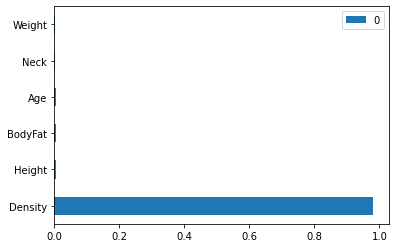

In [105]:
feature_imp.sort_values(by=0,ascending=False).plot(kind='barh')

In [106]:
error_Mat=[]
for i in range (1,10):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    predict_i=knn.predict(X_test)
    error_Mat.append(r2_score(y_test,predict_i))

Text(0, 0.5, 'Error Rate')

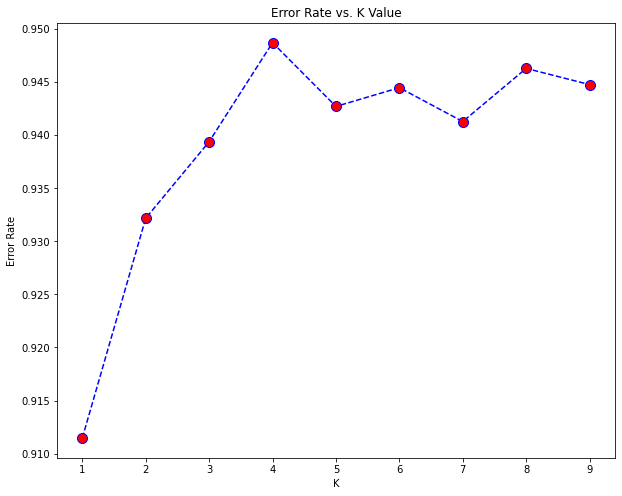

In [107]:
plt.figure(figsize=(10,8))
plt.plot(range(1,10),error_Mat,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [108]:
from sklearn.neighbors import KNeighborsRegressor
knn4=KNeighborsRegressor(n_neighbors=4)

knn4.fit(X_train,y_train)
P=knn4.predict(X_test)

print(np.sqrt(mean_squared_log_error(y_test,P)))
print(mean_absolute_error(y_test,P))
print(mean_squared_error(y_test,P))
print(r2_score(y_test,P))

0.12995656939397837
1.3714285714285712
3.2652040816326524
0.9487152171677512


In [109]:
#Saving the Model

import pickle
file= open('Body Fat Estimator.pkl','wb')
pickle.dump(M1,file)
file.close()